<a href="https://colab.research.google.com/github/ThierrryScotto/Image-classification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the liraries

In [1]:
!pip install bing-image-downloader
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.4 MB/s eta 0:00:00
time: 5.93 ms (started: 2023-03-26 03:08:06 +00:00)


In [23]:
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize
from bing_image_downloader import downloader

from sklearn                 import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics         import  accuracy_score, confusion_matrix

time: 1.65 ms (started: 2023-03-26 03:25:29 +00:00)


# Getting the Data

In [3]:
!mkdir images

time: 126 ms (started: 2023-03-26 03:08:09 +00:00)


#### Getting the images from bing

In [4]:
downloader.download('pretty sunflower', limit=30, output_dir='images', adult_filter_off=True)

[%] Downloading Images to /content/images/pretty sunflower


[!!]Indexing page: 1

[%] Indexed 16 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/--ShcPhgDlI8/UfOJYMdoxMI/AAAAAAAAG_0/pkfkiw2YE88/s1600/beautiful+Sun+flower+(9).jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://thumbs.dreamstime.com/z/beautiful-sunflowers-4317047.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://edendomain.files.wordpress.com/2014/08/close-up-of-sunflowers.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.freejupiter.com/wp-content/uploads/2019/04/Beautiful-Flower-Drawings-Ideas-and-Inspiration-10.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.photographyblogger.net/wp-content/uploads/2010/10/sunflower2.jpg
[!] Issue getting: http://www.photographyblogger.net/wp-content/uploads/2010/10/sunflower2.jpg
[!] Error:: <urlopen error timed out>
[%] Downloading Image #5 from http://2.bp.blogspot.com/-x9KWTogUvo4/TkvVtDP

In [5]:
downloader.download('rugby ball leather', limit=30, output_dir='images', adult_filter_off=True)

[%] Downloading Images to /content/images/rugby ball leather


[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from https://cdn.shopify.com/s/files/1/0226/2169/products/Chromexcel_2048x2048_V1_1024x1024.jpg?v=1511272698
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/0020/1025/1324/products/Vitnage_Brown_Leather_Rugby_Ball_36fcfbe7-d899-4540-9aa6-80ce8e2a0168_1024x.jpg?v=1554242167
[%] File Downloaded !

[%] Downloading Image #3 from http://www.kraveantiques.co.uk/images/products/Brown-Rugby-Ball-1455-7.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-heritage-leather-rugby-ball-2_800x.jpg?v=1561783613
[%] File Downloaded !

[%] Downloading Image #5 from http://www.kraveantiques.co.uk/images/products/1950-Brown-Rugby-Ball-1468-11.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://sportantiques.co.uk/pub/media/catalog/produ

In [6]:
downloader.download('ice cream cone', limit=30, output_dir='images', adult_filter_off=True)

[%] Downloading Images to /content/images/ice cream cone


[!!]Indexing page: 1

[%] Indexed 16 Images on Page 1.


[%] Downloading Image #1 from http://www.madeupinbritain.uk/britimages/IceCreamCone.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.acidcow.com/pics/20130719/ice_cream_cones_80.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://internetpoem.com/img/poems/347/bleezer-s-ice-cream-poem-by-jack-prelutsky.png
[%] File Downloaded !

[%] Downloading Image #4 from https://www.mashed.com/img/gallery/the-untold-truth-of-ice-cream-cones/intro-1587749871.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://media.gettyimages.com/photos/icecream-cone-picture-idFD005142?s=170667a
[%] File Downloaded !

[%] Downloading Image #6 from http://1.bp.blogspot.com/_IET01ZOU3mc/TB6beHa4zyI/AAAAAAAAAtk/9g2_OwXxGPk/s400/ice-cream-cone1.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://sparkpeo.hs.llnwd.net/e1/resize/600w/assets/resource

# Preprocessing

In [7]:
target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['pretty sunflower', 'rugby ball leather', 'ice cream cone']

time: 1.28 ms (started: 2023-03-26 03:13:09 +00:00)


In [8]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR, category)

  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))

    # resize the image
    img_resized = resize(img_array, (150, 150, 3))

    # flatting the data
    flat_data.append(img_resized.flatten())

    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
images    = np.array(images)
target    = np.array(target)

time: 29.5 s (started: 2023-03-26 03:13:09 +00:00)


In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 5.74 ms (started: 2023-03-26 03:13:39 +00:00)


In [10]:
np.unique(target, return_counts=True)

(array([0, 1, 2]), array([30, 30, 30]))

time: 10.9 ms (started: 2023-03-26 03:13:39 +00:00)


<BarContainer object of 3 artists>

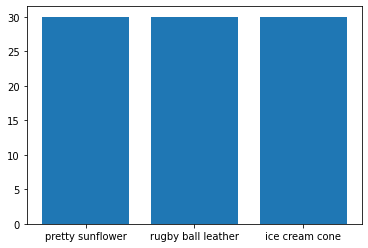

time: 336 ms (started: 2023-03-26 03:13:39 +00:00)


In [11]:
unique, count = np.unique(target, return_counts=True)

plt.bar(CATEGORIES, count)

# Training the model

## Splitting the data into train and test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state=109)

time: 42.1 ms (started: 2023-03-26 03:13:39 +00:00)


## Support Vector Machine



### Grid search of Hyperparameter tuning (tuning)

In [14]:
param_grid = [
    { 'C': [1, 10, 100, 1000], 'kernel': ['linear'] },
    { 'C': [1 ,10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'] },
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 1min 4s (started: 2023-03-26 03:17:15 +00:00)


In [21]:
print(clf.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
time: 2.83 ms (started: 2023-03-26 03:22:59 +00:00)


In [22]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 1])

time: 368 ms (started: 2023-03-26 03:24:12 +00:00)


checking the accurancy

In [24]:
accuracy_score(y_pred, y_test)

0.7407407407407407

time: 22 ms (started: 2023-03-26 03:26:02 +00:00)


In [25]:
confusion_matrix(y_pred, y_test)

array([[8, 1, 3],
       [0, 8, 1],
       [0, 2, 4]])

time: 6.57 ms (started: 2023-03-26 03:26:56 +00:00)


## Deep Learning - TensorFlow

time: 88.5 ms (started: 2023-03-26 03:13:39 +00:00)
